In [1]:
import pandas as pd
import data_util
from tqdm import tqdm_notebook as tqdm
from data_generator import DataGenerator
from state_util import StateUtil
from tec_an import TecAn
from data_agent import *
import numpy as np
from data_util import *
import tensorflow as tf
from sklearn_model_hyper import *
import pandas as pd
from stock_agent import *
from backtest import *
from joblib import dump, load
from datetime import datetime, timedelta
from tec_an import *
from bitstamp import *
from process_live_trade import *
from model_winner_select import *

base_dir = "data/"

In [2]:
currency = "btcusd"

full_data = base_dir + "backtest/"
full_data = base_dir + "4jul21/"
#full_data = base_dir + "btcusd/"
data_gen = DataGenerator(random = False, base_dir = full_data)
data_gen.rewind()
data_count = (data_gen.steps - 100)
#data_count = 200000
raw = data_gen.next()

minute = 30

In [3]:
path = "model/"
files = os.listdir(path)
models = []
for file in files:
    models.append(f"{path}{file}")

models = ['model/rand']
#models = ['model/quadra']
    
timestamp = int(raw['timestamp'])

In [4]:
winner = get_best_model(
    minutes_list=[minute],
    result_paths=models,
    currency_list=[currency],
    timestamp = timestamp,
    winner_path = None
)

  0%|          | 0/10 [00:00<?, ?it/s]

model/rand - 10
Pre selected: 10
https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=1800&limit=1000&start=1625258981
Downloaded from 2021-07-02 21:30:00 to 2021-07-04 23:30:00 35655.00
Resample 30Min - TecAn ( windows 40, windows_limit 100 )
Processing 100 of btcusd


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:14<00:00,  1.42s/it]

Selected: 9
Pipeline(steps=[('normalizer', Normalizer()),
                ('pipeline',
                 Pipeline(steps=[('s',
                                  RFECV(estimator=ExtraTreesClassifier(max_features=0.3),
                                        scoring='recall')),
                                 ('m',
                                  RandomForestClassifier(bootstrap=False,
                                                         criterion='entropy',
                                                         max_features=0.1,
                                                         random_state=42))]))])
btcusd -> 103.36863496765659 | 21 - 9
{'recall': 0.5177065767284992, 'precision': 0.5265866209262435, 'f1': 0.5221088435374149, 'accuracy': 0.6102635228848821, 'roc_auc': 0.5963091187529421}

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
               

In [5]:
result = winner
model = result['model']
window = result['window']
minutes = result['minutes']
step = result['step']
profit = result['profit']
print(f"Minutes={minutes} Window={window} Step={step} | {profit}")
print(f"{model}")

agent, back, stock = get_agent(minutes = minutes,
                                win = window,
                                step = step,
                                currency = currency,
                                hot_load = False,
                                model = model,
                                timestamp = timestamp,
                                simulate_on_price = True)

Minutes=30 Window=40 Step=2 | 140.6828226509521
Pipeline(steps=[('normalizer', Normalizer()),
                ('pipeline',
                 Pipeline(steps=[('s',
                                  RFECV(estimator=ExtraTreesClassifier(max_features=0.3),
                                        scoring='recall')),
                                 ('m',
                                  RandomForestClassifier(bootstrap=False,
                                                         criterion='entropy',
                                                         max_features=0.1,
                                                         random_state=42))]))])
BackTest (pending_sell_steps=2 sell_on_profit=True  value=100
Resample 30Min - TecAn ( windows 40, windows_limit 100 )


In [6]:
import numpy as np
import matplotlib.pyplot as plt
def get_charts(stock_data):
    fig = plt.figure()
    ax = plt.axes()
    x = stock_data
    plt.plot(x, linewidth=1)
    #plt.grid(b=True, color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
    plt.show()


In [7]:
def get_online_data(minutes,
                    val_start,
                    val_end,
                    source_data_generator, 
                    load_from_disk, file_prefix = ""):
    
    online = OnLineDataProvider(
                 source_data_generator = source_data_generator,
                 minutes = minutes,
                 train_keys = [],
                 train_limit = 1000,
                 val_limit = 1000,
                 val_keys = [currency],
                 val_start = val_start,
                 val_end = val_end,
                 train_start_list = val_start
    )

    online_path = f'data/online{file_prefix}_{minutes}'
    
    online.load_val_cache([currency], val_start, val_end)
    
    return online

In [8]:
prices = []
agent.on_closed_price = lambda price: prices.append(price)

on_raw_data = lambda raw: print(raw)


In [9]:
data_gen.rewind()


first = data_gen.next()
#data_count
for i in range(data_count):
    raw = data_gen.next()
    agent.on_new_raw_data(raw)
    

2021-08-14 18:13:39.084049 ModelAgent(35340.23): 2021-07-04 23:00:04(1625439604) UP
2021-08-14 18:13:39.084276 BackTest: Bought: 35340.23
2021-08-14 18:13:43.271065 ModelAgent(35415.34): 2021-07-04 23:30:08(1625441408) UP
2021-08-14 18:13:43.271251 BackTest: Profit detected bid: 35415.34 ask: 35415.34
2021-08-14 18:13:43.271285 BackTest: SOLD >>>> Result: PROFIT 0.2125 total: 100.21253398746978
2021-08-14 18:13:47.087133 ModelAgent(35247.7): 2021-07-05 00:00:17(1625443217) UP
2021-08-14 18:13:47.087295 BackTest: Bought: 35247.7
2021-08-14 18:13:51.399817 ModelAgent(34922.82): 2021-07-05 00:30:08(1625445008) UP
2021-08-14 18:13:55.446446 ModelAgent(34898.82): 2021-07-05 01:00:40(1625446840) UP
2021-08-14 18:13:59.306613 ModelAgent(34639.91): 2021-07-05 01:30:15(1625448615) DOWN
2021-08-14 18:13:59.306951 BackTest: SOLD >>>> Result: LOSS -1.7243 total: 98.48819452702274
2021-08-14 18:14:03.534515 ModelAgent(34560.8): 2021-07-05 02:00:08(1625450408) UP
2021-08-14 18:14:03.534689 BackTest:

In [10]:
val_start = int(first['timestamp'])
val_end = int(raw['timestamp'])

start_string = pd.to_datetime(val_start, unit='s')
end_string = pd.to_datetime(val_end, unit='s')

print(f"{start_string}({val_start}) -> {end_string}({val_end})")

2021-07-04 22:49:41(1625438981) -> 2021-07-05 08:50:02(1625475002)


In [11]:
back.sell(back.buy_price)
back.report()

2021-08-14 18:14:55.753320 BackTest: SOLD >>>> Result: LOSS 0.0 total: 97.83045928919479
-2.16954% -> 97.83045928919479
Positive: 1 Negative: 4


<AxesSubplot:xlabel='Date'>

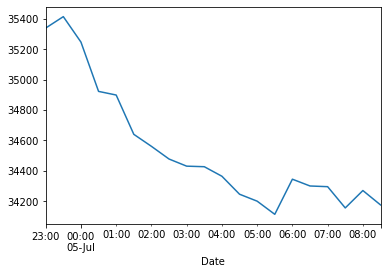

In [12]:
agent.ohlc[1:]["open"].plot()
#agent.ohlc[1:]

In [14]:
#get_charts(prices)
print(len(prices))

20


In [15]:
prices[2]

35247.7

In [16]:
tec = TecAn(windows = window, windows_limit = 100)
source_data_generator = SourceDataGenerator(tec = tec)

In [17]:
online = get_online_data(minutes = minute, 
                 source_data_generator = source_data_generator, 
                 load_from_disk = True, 
                 file_prefix = "____",
                 val_start = val_start,
                 val_end = val_end)

https://www.bitstamp.net/api/v2/ohlc/btcusd/?&currency_pair=btcusd&step=1800&limit=1000&start=1625438981
Downloaded from 2021-07-04 23:30:00 to 2021-07-05 10:00:00 34256.42
Resample 30Min - TecAn ( windows 40, windows_limit 100 )
Processing 21 of btcusd


  0%|          | 0/21 [00:00<?, ?it/s]

In [18]:
x, y = online.load_val_data(currency)

In [30]:
prices_from_provider = y[:-1]
for i, price_from_provider in enumerate(prices_from_provider):
    price_from_raw = prices[i]
    differ = price_from_raw == price_from_provider
    if (not differ):
        print(f"{i}) price_from_provider: {price_from_provider} - price_from_raw: {price_from_raw} -> {price_from_raw == price_from_provider}")

2) price_from_provider: 35255.0 - price_from_raw: 35247.7 -> False
17) price_from_provider: 34149.71 - price_from_raw: 34154.96 -> False


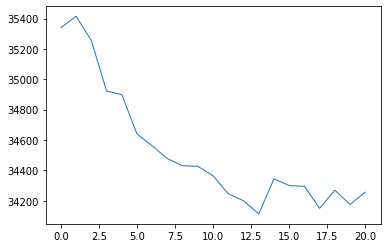

21


In [21]:
get_charts(y)
print(len(y))

In [22]:
agent_array, back_array, stock_array = get_agent(minutes = minutes,
                                win = window,
                                step = step,
                                currency = currency,
                                hot_load = False,
                                model = model,
                                timestamp = timestamp,
                                simulate_on_price = True)

BackTest (pending_sell_steps=2 sell_on_profit=True  value=100
Resample 30Min - TecAn ( windows 40, windows_limit 100 )


In [23]:
for price in prices:
    order = [f"{price}", f"{price}"]
    agent_array.on_state(0, price, order, order)
    agent_array.on_new_price(price,0.0)

2021-08-14 18:14:57.286028 ModelAgent(35340.23): 1970-01-01 00:00:00(0) UP
2021-08-14 18:14:57.286162 BackTest: Bought: 35340.23
2021-08-14 18:14:57.324046 ModelAgent(35415.34): 1970-01-01 00:00:00(0) UP
2021-08-14 18:14:57.324436 BackTest: Profit detected bid: 35415.34 ask: 35415.34
2021-08-14 18:14:57.324481 BackTest: SOLD >>>> Result: PROFIT 0.2125 total: 100.21253398746978
2021-08-14 18:14:57.364124 ModelAgent(35247.7): 1970-01-01 00:00:00(0) UP
2021-08-14 18:14:57.364299 BackTest: Bought: 35247.7
2021-08-14 18:14:57.402646 ModelAgent(34922.82): 1970-01-01 00:00:00(0) UP
2021-08-14 18:14:57.441548 ModelAgent(34898.82): 1970-01-01 00:00:00(0) UP
2021-08-14 18:14:57.479491 ModelAgent(34639.91): 1970-01-01 00:00:00(0) DOWN
2021-08-14 18:14:57.479595 BackTest: SOLD >>>> Result: LOSS -1.7243 total: 98.48819452702274
2021-08-14 18:14:57.518344 ModelAgent(34560.8): 1970-01-01 00:00:00(0) UP
2021-08-14 18:14:57.518482 BackTest: Bought: 34560.8
2021-08-14 18:14:57.559663 ModelAgent(34477.16

In [24]:
back_array.sell(back_array.buy_price)
back_array.report()

2021-08-14 18:14:57.989396 BackTest: SOLD >>>> Result: LOSS 0.0 total: 97.83045928919479
-2.16954% -> 97.83045928919479
Positive: 1 Negative: 4


In [28]:
back, metrics = eval_step(model, currency, step, online, verbose = True)

BackTest (pending_sell_steps=2 sell_on_profit=True  value=100
2021-08-14 18:16:14.355604 BackTest: Bought: 35340.23
2021-08-14 18:16:14.367010 BackTest: Profit detected bid: 35415.34 ask: 35415.34
2021-08-14 18:16:14.367141 BackTest: SOLD >>>> Result: PROFIT 0.2125 total: 100.21253398746978
2021-08-14 18:16:14.389140 BackTest: Bought: 34922.82
2021-08-14 18:16:14.410365 BackTest: SOLD >>>> Result: LOSS -0.8101 total: 99.40243331404194
2021-08-14 18:16:14.422365 BackTest: Bought: 34560.8
2021-08-14 18:16:14.444686 BackTest: SOLD >>>> Result: LOSS -0.3779 total: 99.02457747737148
2021-08-14 18:16:14.496336 BackTest: Bought: 34112.89
2021-08-14 18:16:14.508805 BackTest: Profit detected bid: 34344.29 ask: 34344.29
2021-08-14 18:16:14.508962 BackTest: SOLD >>>> Result: PROFIT 0.6783 total: 99.70291343776651
2021-08-14 18:16:14.531300 BackTest: Bought: 34295.01
2021-08-14 18:16:14.566080 BackTest: SOLD >>>> Result: LOSS -0.3502 total: 99.35271671818545
2021-08-14 18:16:14.579432 BackTest: Bo

In [29]:
back.sell(back.buy_price)
back.report()

2021-08-14 18:16:15.154149 BackTest: SOLD >>>> Result: LOSS 0 total: 99.35271671818545
-0.64728% -> 99.35271671818545
Positive: 2 Negative: 5


In [32]:
model

Pipeline(steps=[('normalizer', Normalizer()),
                ('pipeline',
                 Pipeline(steps=[('s',
                                  RFECV(estimator=ExtraTreesClassifier(max_features=0.3),
                                        scoring='recall')),
                                 ('m',
                                  RandomForestClassifier(bootstrap=False,
                                                         criterion='entropy',
                                                         max_features=0.1,
                                                         random_state=42))]))])